In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tqdm import tqdm

In [10]:
train_path = "./foods/images"
test_path = "./foods/test"
image_size = (180, 180)
batch_size = 64

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)

Found 4500 files belonging to 5 classes.
Using 3600 files for training.
Found 4500 files belonging to 5 classes.
Using 900 files for validation.


In [12]:
def get_label(y):
    return label_names[np.argmax(y, axis=0)]

label_names = []
for dir in os.listdir(train_path):
    label_names += [dir]

label_names

['falafel', 'french_fries', 'ice_cream', 'pancakes', 'pizza']

In [13]:
from keras.models import Sequential
from keras.layers import InputLayer, Rescaling, Conv2D, Flatten, Dense, MaxPooling2D, Dropout, RandomFlip, RandomRotation, BatchNormalization, RandomZoom, RandomTranslation
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [14]:
model = Sequential() # linear stack of layers

model.add(InputLayer(input_shape=(180, 180, 3))) # input layer
model.add(RandomFlip("horizontal")) # random flip
model.add(RandomRotation(0.1)) # random rotation
model.add(Rescaling(1.0/255)) # rescale pixel values to 0-1

model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = "same", activation = "relu")) # convolutional layer
model.add(MaxPooling2D(pool_size = (2, 2))) # max pooling layer
model.add(BatchNormalization()) # batch normalization layer

# lowering kernel size
model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "same", activation = "relu")) # convolutional layer 
model.add(MaxPooling2D(pool_size = (2, 2))) # max pooling layer
model.add(BatchNormalization()) # batch normalization layer

model.add(Conv2D(filters = 96, kernel_size = (3, 3), padding = "same", activation = "relu")) # convolutional layer
model.add(MaxPooling2D(pool_size = (2, 2))) # max pooling layer
model.add(BatchNormalization()) # batch normalization layer

model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu")) # convolutional layer
model.add(MaxPooling2D(pool_size = (2, 2))) # max pooling layer
model.add(BatchNormalization()) # batch normalization layer

model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "same", activation = "relu")) # convolutional layer
model.add(MaxPooling2D(pool_size = (2, 2))) # max pooling layer
model.add(BatchNormalization()) # batch normalization layer

model.add(Flatten()) # flatten the output of the convolutional layers
model.add(Dense(512, activation = activations.relu)) # fully connected layer
model.add(Dropout(0.5)) # dropout layer
model.add(Dense(5, activation = "softmax")) # output layer


In [15]:
model.compile(optimizer=Adam(learning_rate=0.005), loss="categorical_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 90, 90, 32)      

In [16]:
callbacks=[
    keras.callbacks.ModelCheckpoint("./saved_models/7_{epoch}.h5"),
    ReduceLROnPlateau(monitor='val_loss', factor=0.7, patience=5, min_lr=0.001),
]

history = model.fit(train_ds, epochs=50, validation_data=val_ds, batch_size=64, callbacks=callbacks)

Epoch 1/50
57/57 [==============================] - 9s 95ms/step - loss: 4.7365 - accuracy: 0.2953 - val_loss: 23.0228 - val_accuracy: 0.2122 - lr: 0.0050
Epoch 2/50
57/57 [==============================] - 5s 85ms/step - loss: 1.5224 - accuracy: 0.3394 - val_loss: 10.0400 - val_accuracy: 0.2289 - lr: 0.0050
Epoch 3/50
57/57 [==============================] - 5s 85ms/step - loss: 1.4821 - accuracy: 0.3425 - val_loss: 3.8299 - val_accuracy: 0.2967 - lr: 0.0050
Epoch 4/50
57/57 [==============================] - 5s 84ms/step - loss: 1.4893 - accuracy: 0.3506 - val_loss: 3.9691 - val_accuracy: 0.3178 - lr: 0.0050
Epoch 5/50
57/57 [==============================] - 5s 85ms/step - loss: 1.4823 - accuracy: 0.3439 - val_loss: 1.9779 - val_accuracy: 0.3489 - lr: 0.0050
Epoch 6/50
57/57 [==============================] - 5s 88ms/step - loss: 1.4884 - accuracy: 0.3467 - val_loss: 1.4454 - val_accuracy: 0.3811 - lr: 0.0050
Epoch 7/50
57/57 [==============================] - 5s 89ms/step - loss: 1

In [17]:
import matplotlib.pyplot as plt

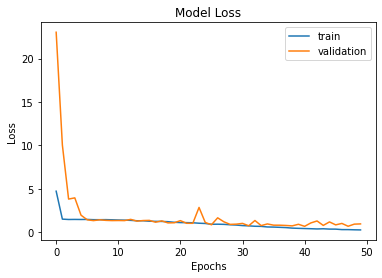

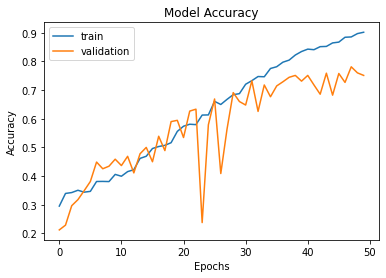

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()